# Lab 2

#### Abstract

#### Introduction

#### Excersice 1.0

Population models are crucial for understanding how populations change over time. Here are some key population dynamics models: 
1. Exponential growth model
   - Equation: $dN/dt = rN$
   - Exponential growth models is a model that does not increase or decrease at a steady rate. It grows proportional to its present size. So f.ex. it will always grow at a rate of 3 times its size or a percentage of its size. This model is often used in early stages of population establishment or where limits and resources are not a concern.[^1]
   - An example of Exponential growth can be bacteria culture which will increase exponential until essential resources are exhausted. 
2. Logistic growth model
   - Equation: $dN/dt = r(1-N/K)N$
   - In the logistic growth model the populations growth percentage will get smaller and smaller as the population size increases until it hits a maximum. This maximum is decided based on resources in the environment and is known as the carrying capacity, the K in the formula.[^1]
   - An example of logistic growth can be yeast, the population will grow until the limit of available nutrients is hit. 
3. Predator-Prey Models(Lotka-Volterra Models)
   - Equation: a system of two differential equations:
     - dx/dt = $\alpha x - \beta xy $ (prey)
     - dy/dt = $\sigma xy - \gamma y$ (predator)
   - The predator-prey model is used to describe the dynamic of a population where two species interact, one as prey and the other as predator. The x variable is the population density of prey and the y variable the predator.
   - The prey is assumed to have unlimited food and reproduce exponentially, represented in the equation as $\alpha x $. $\beta xy$ is the rate of which the prey is being preyed upon. 
   - The predators population growth rate is represented in the equation as $\sigma xy$. While $\gamma y$ stands for the loss rate of the predators, due to emigration or natural death. [^2]
   - An example of this model can be the relationship between rabbits (prey) and foxes (predators). If we assume the rabbits have unlimited food and reproduce exponentially, the population will grow fast. This will cause the population of the foxes to also increase as there is more food, which then again will decrease the population of rabbits and then again the population of foxes. 
4. Metapopulation 
   - Equation: $dN/dt = cN(1-N) - eN$
   - Consists of multiple populations of the same species that interact with each other. "it consists of a population of populations"[^3]. These models focus on populations that are divided into separate groups that occupy habitats. Local populations can go instinct, but migration between these habitats can recolonize empty habitats. [^4]
   - One example of this is with fish, the populations are normally separated but they overlap during breading times which allows for gene flow between populations.
5. Age-Structured Models (Leslie Matrix)
   - Equation: Uses matrices to represent population dynamics across different age groups. 
   - This model is used to model the changes in a population over a period of time. The population is divided into groups based on age. This matrix method can be used to predict the size and structure of next years population for populations with age structure. [^5]
   - Examples where this model is used is fisheries, wildlife management and human demography where survival and reproduction rates differ by age. 

#### Excersice 1.1

- In the logistic growth model the term -aN or as I have written it N/K, represents the negative feedback mechanism as the population is closing in on the carrying capacity K. This decline in population growth can be due to many factors as: Limited resources, environmental constraints or self-regulation. 
- The purpose of modeling this decline is to realistically simulate real-world scenarios in the population. The population does not have unlimited growth due to constraints, which makes the logistic model more accurate for long term predictions. 

#### Excersice 1.2

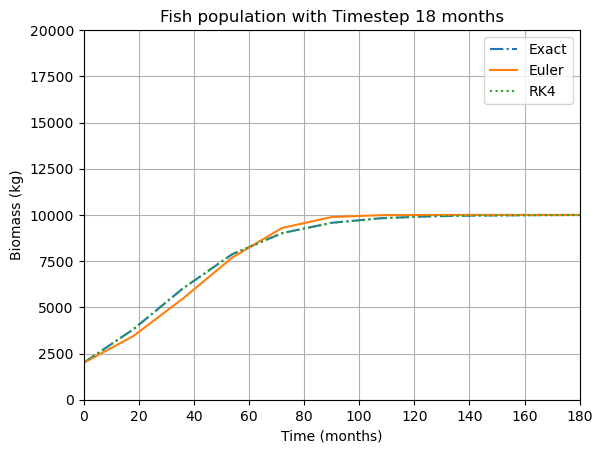

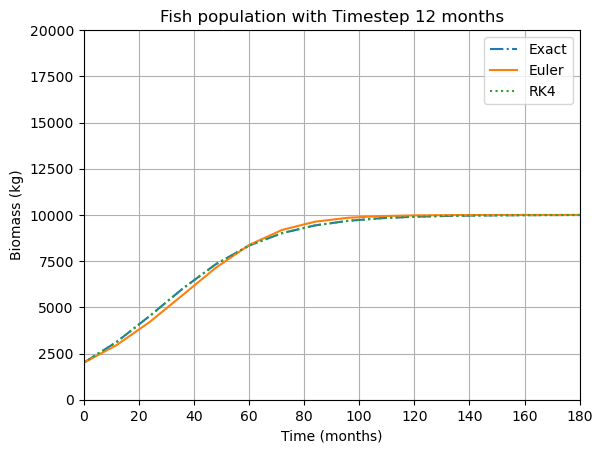

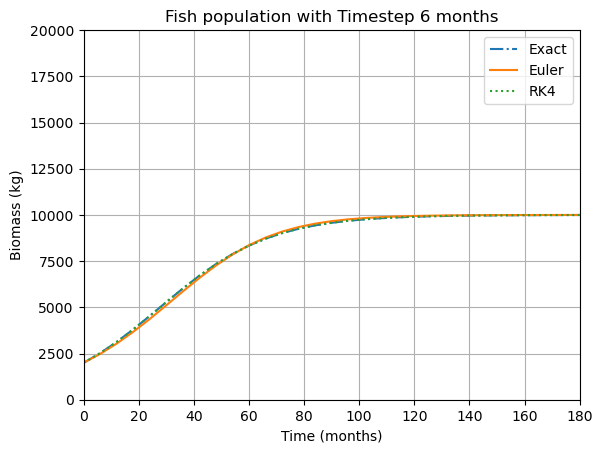

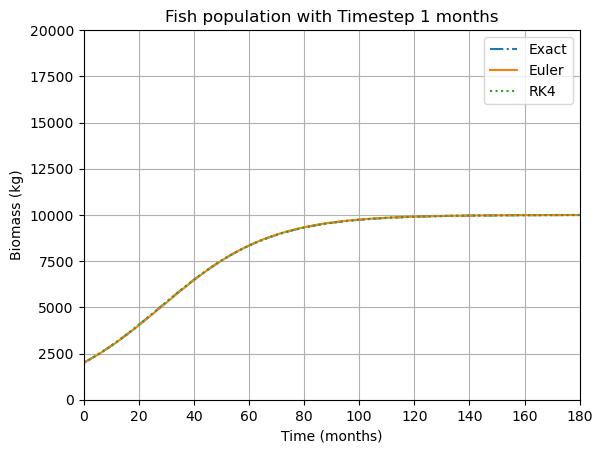

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

starttime = 0
endtime = 12*15

k = 10000
r = 0.6/12

N0= 2000


def exact_solution(t, N0, k, r):
    return N0*k/(N0+(k-N0)*math.exp(-r*t))

def euler_method(N0, r, k, timestep, starttime, endtime):
    t = starttime
    y = N0
    T = [t]
    Y = [y]
    while t < endtime:
        y = y + timestep*r*(1-y/k)*y
        t += timestep
        T.append(t)
        Y.append(y)
    return T, Y

def rk4_method(N0, r, k, timestep, starttime, endtime):
    t = starttime
    y = N0
    T = [t]
    Y = [y]
    while t < endtime:
        k1 = timestep*r*(1-y/k)*y 
        k2 = timestep*r*(1-(y + k1/2)/k)*(y + k1/2)
        k3 = timestep*r*(1-(y + k2/2)/k)*(y + k2/2)
        k4 = timestep*r*(1-(y + k3)/k)*(y + k3)
        y = y + (k1 + 2*k2 +2*k3 + k4)/6
        t+= timestep
        T.append(t)
        Y.append(y)
    return T,Y

def plot_results(T_exact, Y_Exact, T_Euler, Y_Euler, T_rk4, Y_rk4, timestep):
    plt.plot(T_exact, Y_Exact, label='Exact', linestyle='dashdot')
    plt.plot(T_Euler, Y_Euler, label=f'Euler (dt={timestep} months)')
    plt.plot(T_rk4, Y_rk4, label=f'RK4 (dt={timestep} months)', linestyle='dotted')
    plt.title(f'Fish population with Timestep {timestep} months')
    plt.xlabel('Time (months)')
    plt.ylabel('Biomass (kg)')
    plt.ylim(0, 20000)
    plt.xlim(0, endtime)
    plt.grid(True)
    plt.legend(['Exact', 'Euler', 'RK4'])
    plt.show()

timesteps = [18, 12, 6, 1]
for timestep in timesteps:
    T_exact = np.arange(starttime, endtime+timestep, timestep)
    Y_exact = [exact_solution(t, N0, k, r) for t in T_exact]

    T_euler, Y_euler = euler_method(N0, r, k, timestep, starttime, endtime)

    T_rk4, Y_rk4 = rk4_method(N0, r, k, timestep, starttime, endtime)

    plot_results(T_exact, Y_exact, T_euler, Y_euler, T_rk4, Y_rk4, timestep)


- We see that with larger timesteps the Euler methods really deviated from the exact solution as the timestep increases. This is because with a larger timestep we skip over import detail in the curve of the logistic growth. 
- When we have smaller timesteps we see that both methods are closely equal to the exact solution. So for the Euler method a smaller timestep is recommended for the most accurate results. While the Runge kutta method works well with both small timesteps and larger timesteps. To conclude RK4 provides better accuracy than Euler, making it more reliable. 

#### Excersice 1.3

- For N0=0kg we see that the population will remain at zero since there is no initial biomass to grow from. 
- For N0=1kg the population grows very slowly before eventually starting to grow more rapidly and then again stabilizing near the carrying capacity K (10000kg). Here we see a small difference between the euler and the rk4 method. When the population starts growing more rapidly we see that the rk4 method has the steepest slope. 
- N0 = 2000kg starts lower than K, so the population grows rapidly towards K and eventually stabilizes at K. 
- N0 = 10000kg starts exactly at the carrying capacity, so the population remains constant. 
- For N0=15000kg the population initially starts above the carrying capacity so the population starts declining until stabilizing towards K.

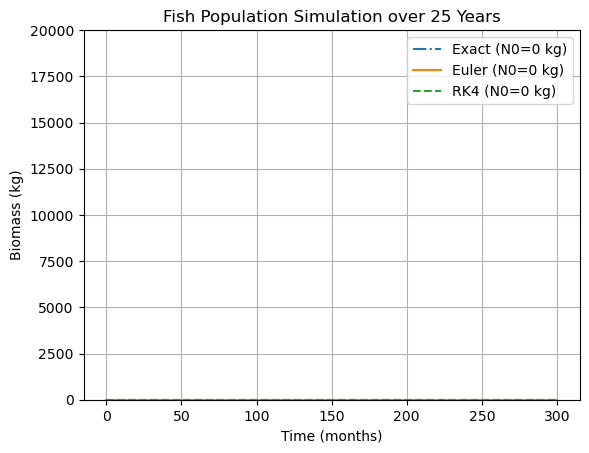

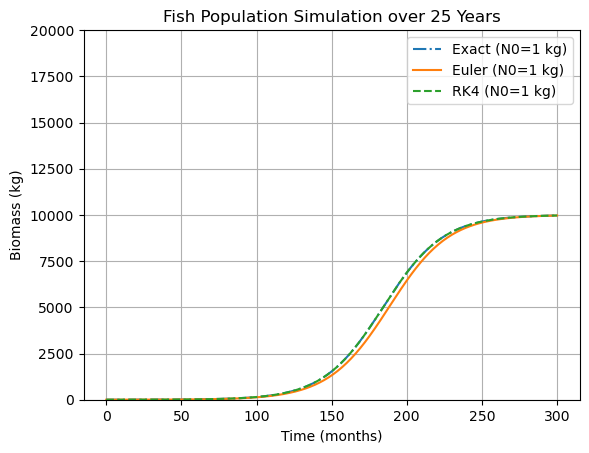

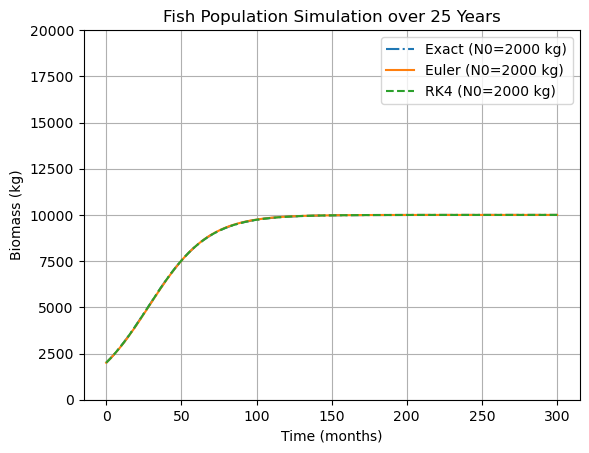

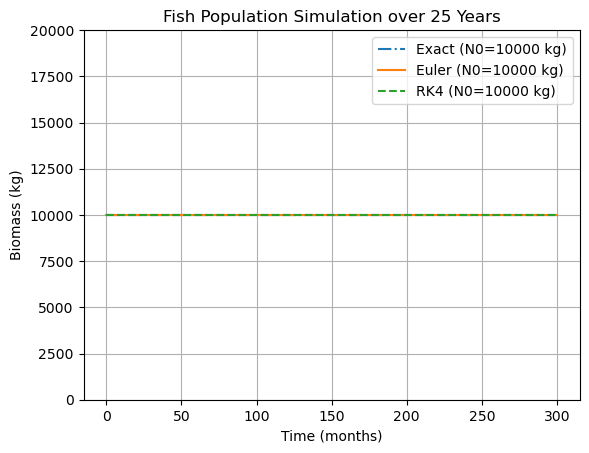

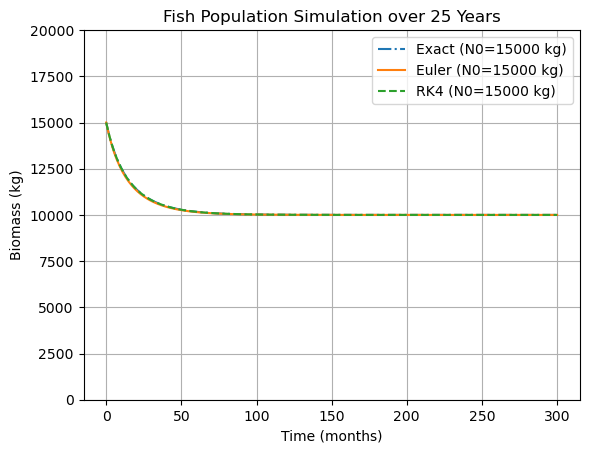

In [12]:
def simulate_population(N0_values, timestep, duration_years):
    for N0 in N0_values:
        T_exact = np.arange(starttime, endtime + timestep, timestep)
        Y_exact = [exact_solution(t, N0, k, r)for t in T_exact]

        T_euler, Y_euler = euler_method(N0, r, k, timestep, starttime, endtime)
        T_rk4, Y_rk4 = rk4_method(N0, r, k, timestep, starttime, endtime)

        plt.plot(T_exact, Y_exact, label=f'Exact (N0={N0} kg)', linestyle='dashdot')
        plt.plot(T_euler, Y_euler, label=f'Euler (N0={N0} kg)')
        plt.plot(T_rk4, Y_rk4, label=f'RK4 (N0={N0} kg)', linestyle='dashed')
        plt.title(f'Fish Population Simulation over {duration_years} Years')
        plt.xlabel('Time (months)')
        plt.ylabel('Biomass (kg)')
        plt.ylim(0, 20000)
        plt.grid(True)
        plt.legend()
        plt.show()

N0_values = [0, 1, 2000, 10000, 15000]
timestep = 1
duration_years = 25
endtime = 12*duration_years

simulate_population(N0_values, timestep, duration_years)


<function matplotlib.pyplot.show(close=None, block=None)>

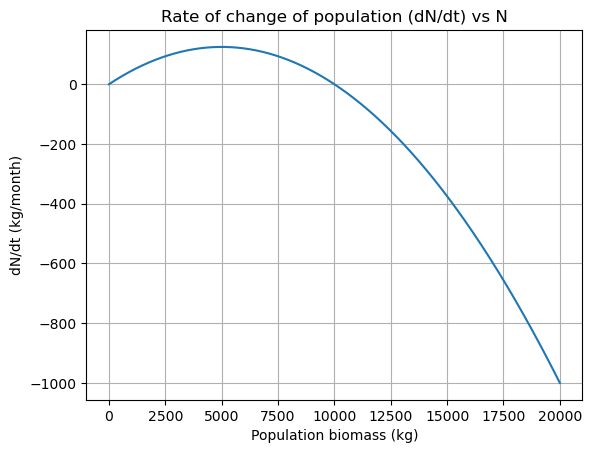

In [13]:
def dN_dt(N, r, K):
    return r*(1-N/K)*N

N_values = np.linspace(0, 20000, 1000)
dN_values = dN_dt(N_values, r, k)
plt.plot(N_values, dN_values)
plt.title('Rate of change of population (dN/dt) vs N')
plt.xlabel('Population biomass (kg)')
plt.ylabel('dN/dt (kg/month)')
plt.grid(True)
plt.show

#### Exersice 1.4

- When N=0, dN/dt = 0, meaning no population growth, as expected. This is because the population starts at zero and will remain at zero since there are no individuals to reproduce. We have also seen this in previous simulations.
- When N=K, dN/dt = 0, meaning the population is at equilibrium, the carrying capacity. The population stabilizes at K which we have seen at almost all previous simulations, only exception is when N=0. 
- To find the population size N at which dN/dt is at max, we take the derivate of dN/dt with respect to N and set it to zero, then simplifying and solving for N.
$$\frac{d}{dN}(r(1- \frac{N}{K})N) = 0 $$
$$r(1-\frac{N}{K}) - r\frac{N}{K} = 0 $$
$$1- 2\frac{N}{K} = 0 $$
$$N = \frac{K}{2} $$
- The population growth is maximized when $N = \frac{K}{2} = 5000 kg$. This represents the point where the population grows at the fastest rate. 
- To find the max value for $\frac{dN}{dt}$ we have to substitute $ N = \frac{K}{2}$ into the equation for $\frac{dN}{dt}$
$$\frac{dN}{dt} = r(1- \frac{5000}{10000})5000 = \frac{rK}{4} $$
- given r = 0.05 per month and K = 10000:
$$= \frac{0.05 * 10000}{4} = 125kg/month $$
- This is the maximum rate at which the population grows and it happens when N = 5000kg. This we have also observed in previous simulations where the initial population starts below or around 5000kg. Around 5000kg we see that the graph is the most steep. 

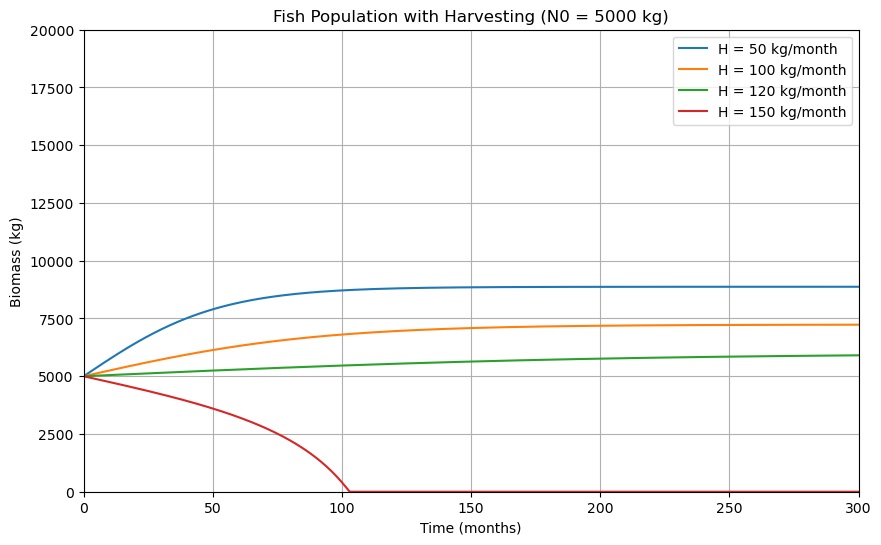

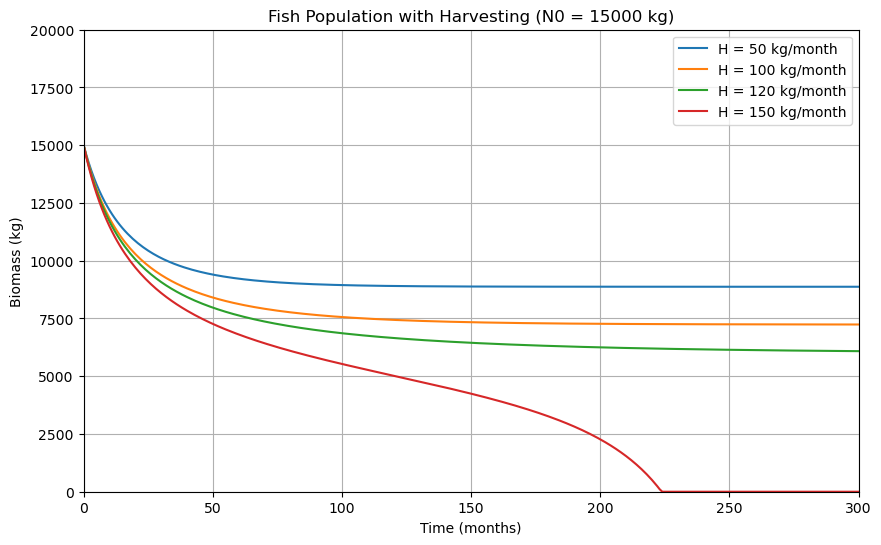

In [14]:
def DHarvest(N, r, k, H):
    return r * (1 - N / k) * N-H

def HarvestKutta4(N0, k, r, timestep, endtime, H):
    THarvest = []
    YHarvest = []

    t = starttime
    N = N0
    THarvest.append(t)
    YHarvest.append(N)

    while t < endtime:
        k1 = timestep * DHarvest(N, r, k, H)
        k2 = timestep * DHarvest(N + 0.5*k1, r, k, H)
        k3 = timestep * DHarvest(N + 0.5*k2, r, k, H)
        k4 = timestep * DHarvest(N + k3, r, k, H)

        N = N + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

        if N <= 0:
            N = 0

        t += timestep
        THarvest.append(t)
        YHarvest.append(N)

    return THarvest, YHarvest

def plot_harvest_scenarios():
    harvest_rates = [50, 100, 120, 150]
    N0_values = [5000, 15000]

    for N0 in N0_values:
        plt.figure(figsize=(10, 6))
        for H in harvest_rates:
            THarvest, YHarvest = HarvestKutta4(N0, k, r, timestep, endtime, H)
            plt.plot(THarvest, YHarvest, label=f'H = {H} kg/month')
        
        plt.title(f'Fish Population with Harvesting (N0 = {N0} kg)')
        plt.xlabel('Time (months)')
        plt.ylabel('Biomass (kg)')
        plt.ylim(0, 20000)
        plt.xlim(0, endtime)
        plt.grid(True)
        plt.legend()
        plt.show()

plot_harvest_scenarios()

#### Exercise 1.5

- Case 1: N0 = 5000kg 
  - Low Harvesting rate(H= 50kg/month): We see that the population grows at a moderate rate and stabilizes at a new equilibrium, lower than the original carrying capacity K because of the constant removal of fish. 
  - Moderate Harvesting rate(H=100kg/month): Population still increases but more slowly, until it hits a new equilibrium and stabilizes. 
  - High harvesting rate(H=120/150 kg/month): At 120kg/month the population barely grows before entering a new equilibrium and stabilizes. With harvesting at 150kg/month the population in declining before collapsing and going to zero. 

- Case 2: N0 = 15000kg
  - Low Harvesting rate(H=50kg/month): The population decreases before eventually stabilizing at a new equilibrium lower than the carrying capacity.
  - Moderate harvesting rate (H=100kg/month): The population decreases at a faster rate before stabilizing at a new equilibrium below K. 
  - High harvesting rate(H=120/150 kg/month): At 120kg/month the decline is even faster but again will stabilize at a level lower than K and also lower than the other two harvesting rates. When harvesting is at 150kg/month the population decreases at a fast pace before decreasing a bit slower again and then collapsing and reaching zero in the end. 

- Low harvesting rates allow the population to maintain itself, but will stabilize lower than the carrying capacity. High rates (Higher than 120kg/month) will lead to population collapse, which demonstrates that there is a threshold for harvesting. 
- A larger initial population size delays the eventual collapse when using high rates but it does not prevent it. 

#### Exersice 1.6

- To determine the Maximum Sustainable Yield (MSY), we need to calculate the critical limit at which the fish population can sustain the maximum harvest rate without collapsing. This is when the population is at an equilibrium point and the harvesting rate matches the population growth at its maximum. We know the that the population growth is maximized when the population is half the carrying capacity $N = \frac{K}{2}$. This gives the population growth rate: $ \frac{rK}{4}$
- The maximum sustainable yield occurs when the harvesting rate is equal to the maximum population growth rate: $ \frac{rK}{4}$. Lets calculate MSY.
$$H_{MSY} =  \frac{rK}{4} = \frac{(\frac{0.6}{12})*10000}{4} = \frac{500}{4} = 125kg/month $$
- This means that if we harvest fish at a rate of 125kg/month the population can sustain itself without collapsing.

#### Exercise 1.7

- To find the two points of equilibrium when the harvesting rate H is less than the MSY, we start with the modified logistic growth equation with harvesting. Since the population remains constant at equilibrium we set $\frac{dN}{dt} = 0$ we now get:
$$r(1- \frac{N}{K})N - H = 0 $$
And solve for N
$$rN(1-\frac{N}{K}) = H $$
$$rN - \frac{rN^2}{K} = H $$
$$\frac{r}{K}N^2 - rN + H = 0 $$
$$N^2 - KN + \frac{KH}{r} = 0 $$
$$N = -(-K) \pm \sqrt{\frac{(-K)^2 - 4(1)(\frac{KH}{r})}{2(1)} } $$
- The two equilibrium points are:
$$N_1 = \frac{K + \sqrt{K^2 - \frac{4KH}{r}}}{2} $$
$$N_2 = \frac{K - \sqrt{K^2 - \frac{4KH}{r}}}{2} $$
- To determine the stability of these equilibrium points we look at the signs around the points. 
  - N1(Larger equilibrium): This is a stable equilibrium point, if N is slightly changed to above or below this point, the population will return to this equilibrium over time. 
  - N2(smaller equilibrium): This is an unstable equilibrium point. If N is changed to above the point the population will grow towards N1. If N is changed to below this point the population will collapse to zero
- The reason for these behaviors is that the larger equilibrium is a point where population growth and harvesting balance each other, while the smaller one is a point where the population cannot sustain itself under the current harvesting pressure. 
- As H increases the equilibrium points move closer together. When H reaches MSY, the two points will coincide. If H is larger than MSY the discriminant in the formula will become negative, meaning no real equilibrium points and the population will collapse. 
- The initial population N0 is important, if N0 is greater than N2 the population will grow toward N1. If N0 is less than N2 the population will collapse to zero.

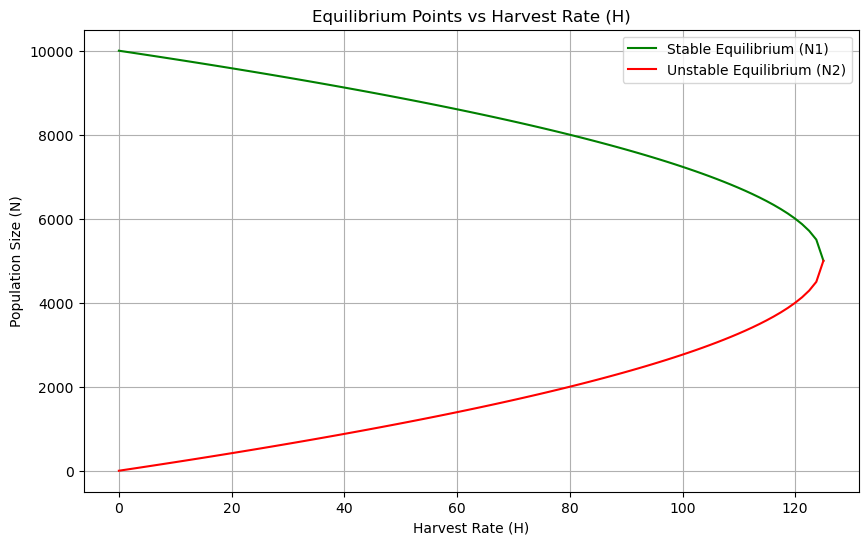

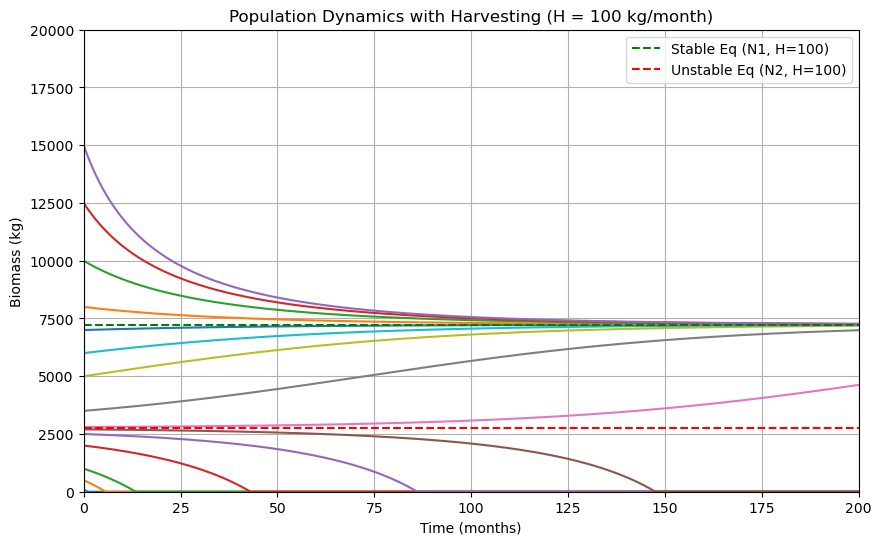

In [15]:
def equilibrium_points(k, r, H):
    discriminant = r**2 - 4 * (r / k) * H
    if discriminant >= 0:
        N1 = (r + np.sqrt(discriminant)) / (2 * r / k)
        N2 = (r - np.sqrt(discriminant)) / (2 * r / k)
        return N1, N2
    else:
        return None, None

def plot_equilibrium_vs_H(k, r):
    H_values = np.linspace(0, r*k/4, 100)
    N1_values = []
    N2_values = []

    for H in H_values:
        N1, N2 = equilibrium_points(k, r, H)
        if N1 is not None:
            N1_values.append(N1)
            N2_values.append(N2)
        else:
            N1_values.append(np.nan)
            N2_values.append(np.nan)

    plt.figure(figsize=(10, 6))
    plt.plot(H_values, N1_values, label='Stable Equilibrium (N1)', color='g')
    plt.plot(H_values, N2_values, label='Unstable Equilibrium (N2)', color='r')
    plt.title('Equilibrium Points vs Harvest Rate (H)')
    plt.xlabel('Harvest Rate (H)')
    plt.ylabel('Population Size (N)')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_population_dynamics(k, r, timestep, endtime):
    H = 100
    N0_values = [100, 500, 1000, 2000, 2500, 2700, 2800, 3500, 5000, 6000, 7000, 8000, 10000, 12500, 15000]

    plt.figure(figsize=(10, 6))

    for N0 in N0_values:
        THarvest, YHarvest = HarvestKutta4(N0, k, r, timestep, endtime, H)
        plt.plot(THarvest, YHarvest)

    N1, N2 = equilibrium_points(k, r, H)
    if N1 is not None and N2 is not None:
        plt.axhline(y=N1, color='g', linestyle='--', label=f'Stable Eq (N1, H={H})')
        plt.axhline(y=N2, color='r', linestyle='--', label=f'Unstable Eq (N2, H={H})')

    plt.title('Population Dynamics with Harvesting (H = 100 kg/month)')
    plt.xlabel('Time (months)')
    plt.ylabel('Biomass (kg)')
    plt.ylim(0, 20000)
    plt.xlim(0, endtime)
    plt.grid(True)
    plt.legend()
    plt.show()

k = 10000
r = 0.6 / 12
timestep = 0.1
endtime = 200

plot_equilibrium_vs_H(k, r)

plot_population_dynamics(k, r, timestep, endtime)


- In the graph we see the two equilimbrium points where we harvested at a rate of 100 kg/month which is lower than the maximum sustainable yield. We see the two equilimbrium points at which one is stable and the other is unstable, the stable equilimbrium indicates the plateau where the fishpopulation stabalize, and the unstable equilimbrium indicates how many fish there atleast needs to be for it to reach the stable equilimbrium with the harvest rate of 100 kg/month, if it is under, the harvest rate is too large so the population will continue to decline. The upper graph indicates how the equilimbrium points is affected by the harvest rate, a larger harvest rate will set a stable equilimbrium lower, and increase the unstable equilimbrium so the initial startmass of the fishpopulation need to be higher. The stable and unstable meet at 125 kg/month since this is the maximum sustainable yield for the fishpopulation.

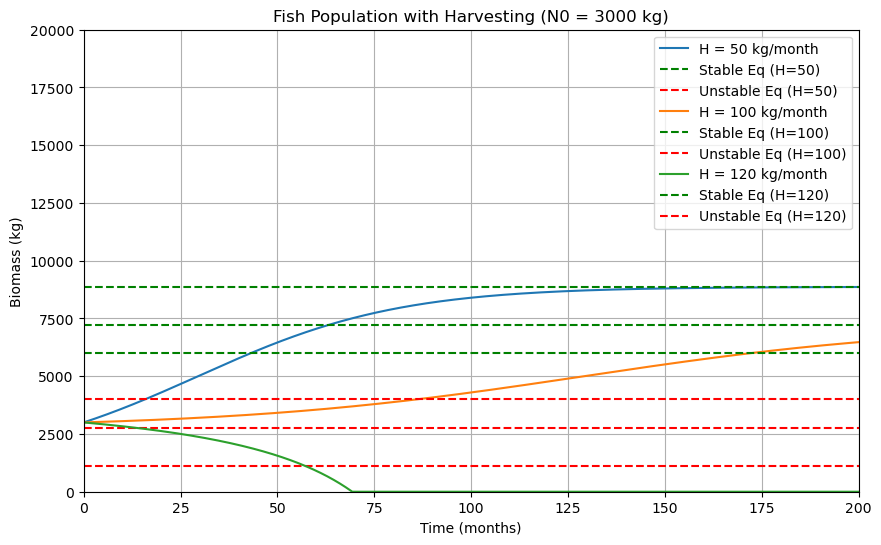

In [16]:
def plot_harvest_scenarios(k, r, timestep, endtime):
    harvest_rates = [50, 100, 120]
    N0_values = [3000]

    for N0 in N0_values:
        plt.figure(figsize=(10, 6))
        for H in harvest_rates:
            THarvest, YHarvest = HarvestKutta4(N0, k, r, timestep, endtime, H)
            plt.plot(THarvest, YHarvest, label=f'H = {H} kg/month')

            N1, N2 = equilibrium_points(k, r, H)

            if N1 is not None and N2 is not None:
                plt.axhline(y=N1, color='g', linestyle='--', label=f'Stable Eq (H={H})')
                plt.axhline(y=N2, color='r', linestyle='--', label=f'Unstable Eq (H={H})')

        plt.title(f'Fish Population with Harvesting (N0 = {N0} kg)')
        plt.xlabel('Time (months)')
        plt.ylabel('Biomass (kg)')
        plt.ylim(0, 20000)
        plt.xlim(0, endtime)
        plt.grid(True)
        plt.legend()
        plt.show()

plot_harvest_scenarios(k, r, timestep, endtime)

- This is another vizualization of how the harvest rate affects the equelimbrium points. The different harvest rates shown, is set at 50, 100 and 120 kg/month, and initial startvalue of the population is set to 3000. This is to display that for the situations with 50 and 100 kg/month set as harvest rate, the population will reach their stable equilimbrium points and plateau, where as for the harvest rate of 120 kg/month, the initial startvalue of the population is under the unstable equilimbrium, meaning that the harvest rate is to large, and the fishpopulation will continue to decline.

#### Excersice 1.8

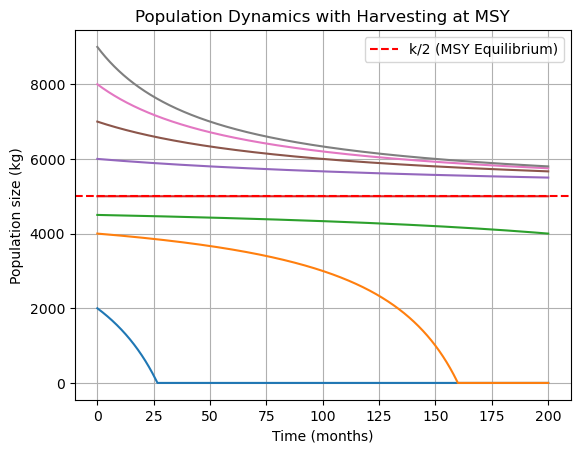

In [17]:
k = 10000
r = 0.6 / 12
H_MSY = r * k / 4

initial_populations = [2000, 4000, 4500, 5000, 6000, 7000, 8000, 9000]
for N0 in initial_populations:
    T_harvest, Y_harvest = HarvestKutta4(N0, k, r, timestep, endtime, H_MSY)
    plt.plot(T_harvest, Y_harvest)

plt.axhline(k / 2, color='red', linestyle='--', label='k/2 (MSY Equilibrium)')
plt.title('Population Dynamics with Harvesting at MSY')
plt.xlabel('Time (months)')
plt.ylabel('Population size (kg)')
plt.legend()
plt.grid(True)
plt.show()

- This simulation tells us that harvesting at the MSY when the population is too low, will most likely lead to the population's collapse. In general, harvesting at the MSY could be quite risky, as it needs extremely accurate knowledge and control of the population size. So even though it leads to the most yield, it is more safe to harvest below the MSY to ensure sustainability. 

#### Excersice 1.9

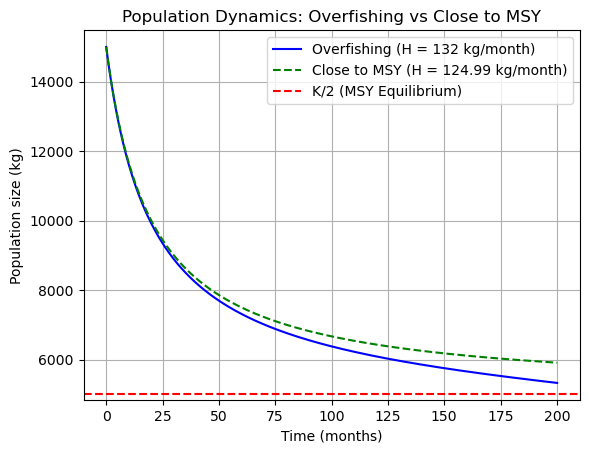

In [18]:
H_overfishing = 132
H_close_to_MSY = 124.99

initial_population = 15000

T_overfishing, Y_overfishing = HarvestKutta4(initial_population, k, r, timestep, endtime, H_overfishing)

T_close_to_MSY, Y_close_to_MSY = HarvestKutta4(initial_population, k, r, timestep, endtime, H_close_to_MSY)

plt.plot(T_overfishing, Y_overfishing, label=f'Overfishing (H = {H_overfishing} kg/month)', color='blue')
plt.plot(T_close_to_MSY, Y_close_to_MSY, label=f'Close to MSY (H = {H_close_to_MSY} kg/month)', linestyle='--', color='green')

plt.axhline(k / 2, color='red', linestyle='--', label='K/2 (MSY Equilibrium)')
plt.title('Population Dynamics: Overfishing vs Close to MSY')
plt.xlabel('Time (months)')
plt.ylabel('Population size (kg)')
plt.legend()
plt.grid(True)
plt.show()

- We can see that they both sink fairly quickly and heavily, meaning that the closer you are to the MSY (or the further you are above), the mmore the population size will reduce. This shows us that it is important to act quickly if you over harvest, as the population drops significantly with a high harvest, and it is fairly close between if you harvest at just the MSY, or over harvest. 
But, as we can see, the value at 124.99 slows down right by 6000, which we can see in the other graphs is close to an equilibrium point. While the harvest at 132 continues to sink, signaling that the population will soon die out. 
So harvesting at the MSY will not lead to extinction, but as we can see on this graph and on earlier task, it is extremely risky and for long term sustainability, it is better to harvest at a slower rate well below the MSY.

#### Excersice 1.10

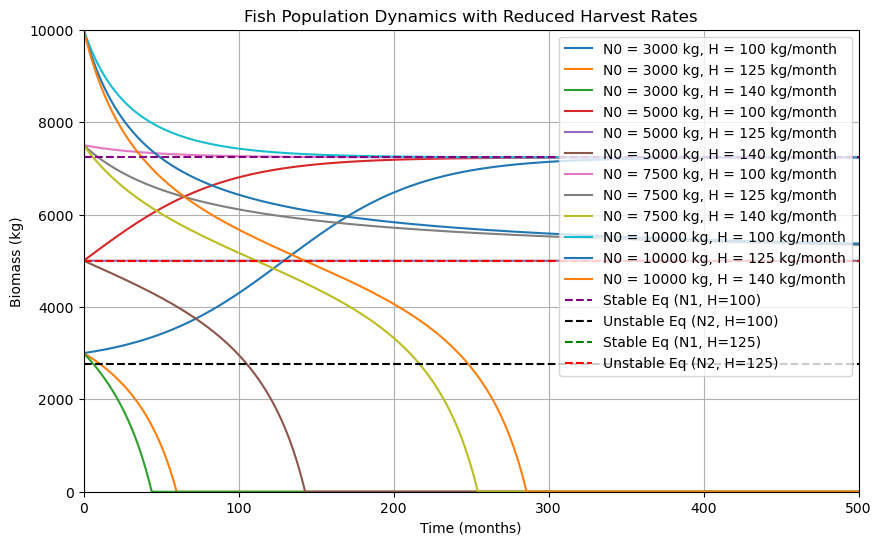


Initial Population: 3000 kg
  Harvest Rate = 100 kg/month: Recovery Time = 172.20 months
  Harvest Rate = 125 kg/month: Recovery Time = 500.00 months
  Harvest Rate = 140 kg/month: Recovery Time = 500.00 months

Initial Population: 5000 kg
  Harvest Rate = 100 kg/month: Recovery Time = 43.10 months
  Harvest Rate = 125 kg/month: Recovery Time = 500.00 months
  Harvest Rate = 140 kg/month: Recovery Time = 500.00 months

Initial Population: 7500 kg
  Harvest Rate = 100 kg/month: Recovery Time = 0.00 months
  Harvest Rate = 125 kg/month: Recovery Time = 0.00 months
  Harvest Rate = 140 kg/month: Recovery Time = 0.00 months

Initial Population: 10000 kg
  Harvest Rate = 100 kg/month: Recovery Time = 0.00 months
  Harvest Rate = 125 kg/month: Recovery Time = 0.00 months
  Harvest Rate = 140 kg/month: Recovery Time = 0.00 months


In [19]:
def recovery_time(N0, k, r, timestep, endtime, H, recovery_threshold=0.6):
    THarvest, YHarvest = HarvestKutta4(N0, k, r, timestep, endtime, H)
    for i, N in enumerate(YHarvest):
        if N >= recovery_threshold * k:
            return THarvest[i]
    return endtime

def plot_recovery_scenarios(k, r, timestep, endtime):
    harvest_rates = [100, 125, 140]
    N0_values = [3000, 5000, 7500, 10000]

    plt.figure(figsize=(10, 6))

    for N0 in N0_values:
        for H in harvest_rates:
            THarvest, YHarvest = HarvestKutta4(N0, k, r, timestep, endtime, H)
            plt.plot(THarvest, YHarvest, label=f'N0 = {N0} kg, H = {H} kg/month')

    N1, N2 = equilibrium_points(k, r, H=100)
    N3, N4 = equilibrium_points(k, r, H=125)
    plt.axhline(y=N1, color='purple', linestyle='--', label='Stable Eq (N1, H=100)')
    plt.axhline(y=N2, color='black', linestyle='--', label='Unstable Eq (N2, H=100)')
    plt.axhline(y=N3, color='g', linestyle='--', label='Stable Eq (N1, H=125)')
    plt.axhline(y=N4, color='r', linestyle='--', label='Unstable Eq (N2, H=125)')
    plt.title('Fish Population Dynamics with Reduced Harvest Rates')
    plt.xlabel('Time (months)')
    plt.ylabel('Biomass (kg)')
    plt.ylim(0, k)
    plt.xlim(0, endtime)
    plt.grid(True)
    plt.legend()
    plt.show()

def evaluate_recovery_times(k, r, timestep, endtime):
    harvest_rates = [100, 125, 140]
    N0_values = [3000, 5000, 7500, 10000]

    for N0 in N0_values:
        print(f"\nInitial Population: {N0} kg")
        for H in harvest_rates:
            time_to_recover = recovery_time(N0, k, r, timestep, endtime, H)
            print(f"  Harvest Rate = {H} kg/month: Recovery Time = {time_to_recover:.2f} months")

k = 10000
r = 0.6 / 12
timestep = 0.1
endtime = 500

plot_recovery_scenarios(k, r, timestep, endtime)
evaluate_recovery_times(k, r, timestep, endtime)

#### 1.10+

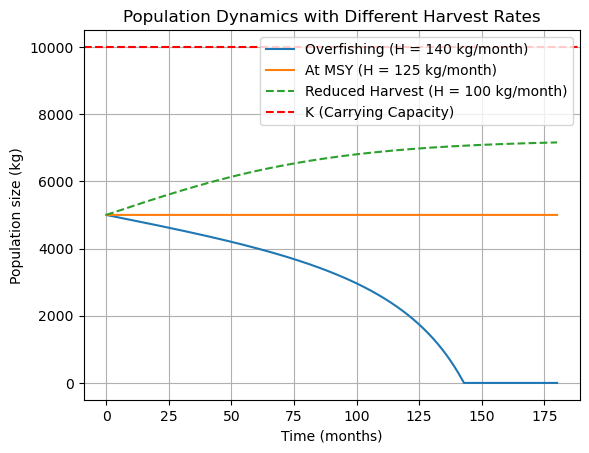

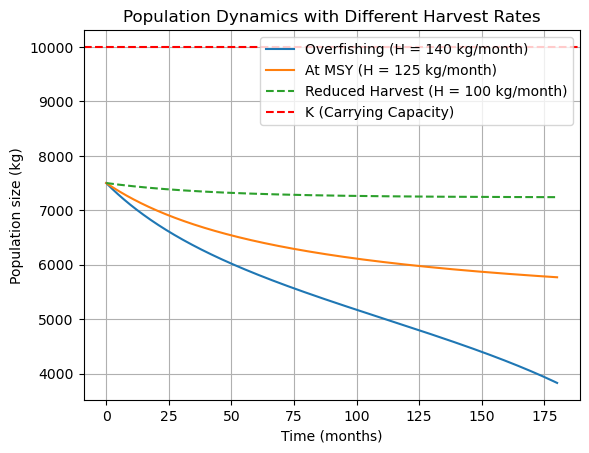

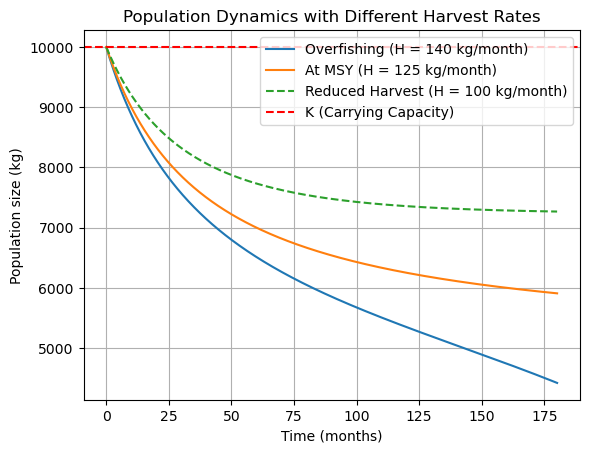

In [20]:
starttime = 0
endtime = 12*15

K = 10000
r = 0.6/12

N0_1= 5000
N0_2= 7500 
N0_3= 10000  

H_overfishing = 140  

H_MSY = 125  

H_reduced = 100 


T_overfishing, Y_overfishing = HarvestKutta4(N0_1, K, r, timestep, endtime, H_overfishing)
T_MSY, Y_MSY = HarvestKutta4(N0_1, K, r, timestep, endtime, H_MSY)
T_reduced, Y_reduced = HarvestKutta4(N0_1, K, r, timestep, endtime, H_reduced)

plt.plot(T_overfishing, Y_overfishing, label=f'Overfishing (H = {H_overfishing} kg/month)')
plt.plot(T_MSY, Y_MSY, label=f'At MSY (H = {H_MSY} kg/month)')
plt.plot(T_reduced, Y_reduced, label=f'Reduced Harvest (H = {H_reduced} kg/month)', linestyle='--')

plt.axhline(K, color='red', linestyle='--', label='K (Carrying Capacity)')
plt.title('Population Dynamics with Different Harvest Rates')
plt.xlabel('Time (months)')
plt.ylabel('Population size (kg)')
plt.legend()
plt.grid(True)
plt.show()

T_overfishing_2, Y_overfishing_2 = HarvestKutta4(N0_2, K, r, timestep, endtime, H_overfishing)
T_MSY_2, Y_MSY_2 = HarvestKutta4(N0_2, K, r, timestep, endtime, H_MSY)
T_reduced_2, Y_reduced_2 = HarvestKutta4(N0_2, K, r, timestep, endtime, H_reduced)

plt.plot(T_overfishing_2, Y_overfishing_2, label=f'Overfishing (H = {H_overfishing} kg/month)')
plt.plot(T_MSY_2, Y_MSY_2, label=f'At MSY (H = {H_MSY} kg/month)')
plt.plot(T_reduced_2, Y_reduced_2, label=f'Reduced Harvest (H = {H_reduced} kg/month)', linestyle='--')

plt.axhline(K, color='red', linestyle='--', label='K (Carrying Capacity)')
plt.title('Population Dynamics with Different Harvest Rates')
plt.xlabel('Time (months)')
plt.ylabel('Population size (kg)')
plt.legend()
plt.grid(True)
plt.show()

T_overfishing_3, Y_overfishing_3 = HarvestKutta4(N0_3, K, r, timestep, endtime, H_overfishing)
T_MSY_3, Y_MSY_3 = HarvestKutta4(N0_3, K, r, timestep, endtime, H_MSY)
T_reduced_3, Y_reduced_3 = HarvestKutta4(N0_3, K, r, timestep, endtime, H_reduced)

plt.plot(T_overfishing_3, Y_overfishing_3, label=f'Overfishing (H = {H_overfishing} kg/month)')
plt.plot(T_MSY_3, Y_MSY_3, label=f'At MSY (H = {H_MSY} kg/month)')
plt.plot(T_reduced_3, Y_reduced_3, label=f'Reduced Harvest (H = {H_reduced} kg/month)', linestyle='--')

plt.axhline(K, color='red', linestyle='--', label='K (Carrying Capacity)')
plt.title('Population Dynamics with Different Harvest Rates')
plt.xlabel('Time (months)')
plt.ylabel('Population size (kg)')
plt.legend()
plt.grid(True)
plt.show()

#### Conclusion

#### Reflections

#### References

[^1]: https://www.khanacademy.org, https://www.khanacademy.org/science/ap-biology/ecology-ap/population-ecology-ap/a/exponential-logistic-growth 


[^2]: Sandeep Kumar C H, "Lotka-Volterra Model", https://sail.usc.edu, 02.10.2024, https://sail.usc.edu/~lgoldste/ArtPhon/Slides/lotka-volterramodel.pdf 

[^3]:https://en.wikipedia.org, https://en.wikipedia.org/wiki/Metapopulation 

[^4]:https://www.cnr.berkeley.edu,  https://www.cnr.berkeley.edu/beislab/rail/html/rail_metapopulation_ecology.html

[^5]:https://bio.libretexts.org, https://bio.libretexts.org/Courses/Gettysburg_College/02%3A_Principles_of_Ecology_-_Gettysburg_College_ES_211/07%3A_A_Quantitative_Approach_to_Population_Ecology/7.03%3A_Leslie_Matrix_Models